<a href="https://colab.research.google.com/github/james-caldwell1981/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment_Caldwell_James_TL_Hadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [ ]:
'''
How Baby Boomers Get High
Drug Use by Age
Article: https://fivethirtyeight.com/features/how-baby-boomers-get-high/
Github: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget 'https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv'

--2020-07-20 18:20:29--  https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2495 (2.4K) [text/plain]
Saving to: ‘drug-use-by-age.csv’

drug-use-by-age.csv 100%[===================>]   2.44K  --.-KB/s    in 0s      

2020-07-20 18:20:29 (37.8 MB/s) - ‘drug-use-by-age.csv’ saved [2495/2495]



In [ ]:
!head 'drug-use-by-age.csv'

65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,0.0,120.0,0.1,2.0,0.0,-,0.6,24.0,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0

In [ ]:
df = pd.read_csv('drug-use-by-age.csv')

In [ ]:
print(df.shape)
df.head()


(17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [ ]:
df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [ ]:
cols_to_drop = [i for i in df.columns if i[-10:] == '-frequency']

In [ ]:
[i for i in df.columns if i[-10:] == '-frequency']

['alcohol-frequency',
 'marijuana-frequency',
 'cocaine-frequency',
 'crack-frequency',
 'heroin-frequency',
 'hallucinogen-frequency',
 'inhalant-frequency',
 'pain-releiver-frequency',
 'oxycontin-frequency',
 'tranquilizer-frequency',
 'stimulant-frequency',
 'meth-frequency',
 'sedative-frequency']

In [ ]:
drug_use = df.drop(columns=cols_to_drop, axis=1)

In [ ]:
drug_use.head(11)

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [ ]:
drug_use.dtypes

age                   object
n                      int64
alcohol-use          float64
marijuana-use        float64
cocaine-use          float64
crack-use            float64
heroin-use           float64
hallucinogen-use     float64
inhalant-use         float64
pain-releiver-use    float64
oxycontin-use        float64
tranquilizer-use     float64
stimulant-use        float64
meth-use             float64
sedative-use         float64
dtype: object

In [ ]:
total_pop = drug_use['n'].sum()

In [ ]:
type(total_pop)

numpy.int64

In [ ]:
'''
I got hung up here because drug_use[col][i]
returned a string and I thought it would be
a float. I used multiple methodologies to
rule out other issues before checking the 
type. I forgot to filter the first two
columns 'age' and 'n'.



for j in range(len(drug_use.columns)):
    col = drug_use.columns[j]
    if drug_use.columns[j] != 'n' and drug_use.columns[j] != 'age':
        num_users = []
        for i in range(len(drug_use.index)):
            num_users = drug_use['n'][0] * (drug_use['alcohol-use']*.01)
            drug_use[drug_use.columns[j]+'rs'] = num_users
'''

"\nI got hung up here because drug_use[col][i]\nreturned a string and I thought it would be\na float. I used multiple methodologies to\nrule out other issues before checking the \ntype. I forgot to filter the first two\ncolumns 'age' and 'n'.\n\n\n\nfor j in range(len(drug_use.columns)):\n    col = drug_use.columns[j]\n    if drug_use.columns[j] != 'n' and drug_use.columns[j] != 'age':\n        num_users = []\n        for i in range(len(drug_use.index)):\n            num_users = drug_use['n'][0] * (drug_use['alcohol-use']*.01)\n            drug_use[drug_use.columns[j]+'rs'] = num_users\n"

In [ ]:
drug_use

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [ ]:
users_filtered = drug_use[[65>int(drug_use['age'][i][:2])>49 for i in drug_use['age'].index]]

In [ ]:
users_filtered.head()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
15,50-64,3923,67.2,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2


In [ ]:
drug_col_list = ['marijuana-use',
                     'pain-releiver-use',
                     'tranquilizer-use',
                     'cocaine-use',
                     'crack-use',
                     'oxycontin-use',
                     'stimulant-use',
                     'hallucinogen-use',
                     'sedative-use',
                     'inhalant-use',
                     'meth-use',
                     'heroin-use']

In [ ]:
user_percent = users_filtered[drug_col_list]
user_percent.head()

,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
15,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1


In [ ]:
user_percent.reset_index(inplace=True)

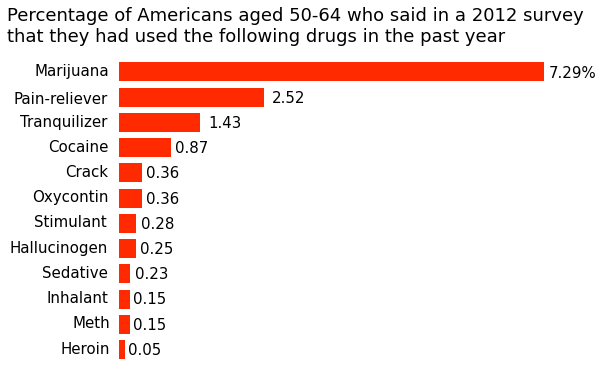

In [ ]:
'''
With horizontal barplots I didn't realize the bars
do not automatically populate like they do in a
regular barplot, so I got stuck not knowing how
to get my data into the graph. Another issue was
that I was setting the size of the figure before
creating the bars. This caused scaling issues I
learned from a stack overflow post after a lot
of digging. From my understanding, the order of
operations below is going to cause the least
number of issues regarding how the plot is
assembled. Essentially, declare the plots and
subplots, then work backwards from inside out to
build each figure. The exceptions seem to be any
object which dictates the width whether directly
or indirectly.

When adding the footer with the horizontal rule,
the entire figure stretched out and threw off all
other element positions.
'''

fig, ax = plt.subplots()

fig.set_figwidth(8)
fig.set_figheight(6)

title_dict={'fontsize':18, 'horizontalalignment':'left', 'position':(-.25,1)}
ax.set_title(fontdict=title_dict, label='Percentage of Americans aged 50-64 who said in a 2012 survey\nthat they had used the following drugs in the past year')

ax.barh(12,
        width=user_percent['marijuana-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.45,11.85,
        'Marijuana',
        fontsize=15)
ax.text(7.39, 11.77,
        '7.29%',
        fontsize=15)

ax.barh(11,
        width=user_percent['pain-releiver-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.8,10.75,
        'Pain-reliever',
        fontsize=15)
ax.text(2.62, 10.8,
        '2.52',
        fontsize=15)

ax.barh(10,
        width=user_percent['tranquilizer-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.7,9.85,
        'Tranquilizer',
        fontsize=15)
ax.text(1.53, 9.8,
        '1.43',
        fontsize=15)

ax.barh(9,
        width=user_percent['cocaine-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.22,8.85,
        'Cocaine',
        fontsize=15)
ax.text(0.97, 8.8,
        '0.87',
        fontsize=15)

ax.barh(8, width=user_percent['crack-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-.925,7.85,
        'Crack',
        fontsize=15)
ax.text(.46, 7.8,
        '0.36',
        fontsize=15)

ax.barh(7,
        width=user_percent['oxycontin-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.49,6.85,
        'Oxycontin',
        fontsize=15)
ax.text(0.46, 6.8,
        '0.36',
        fontsize=15)

ax.barh(6,
        width=user_percent['stimulant-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.45,5.85,
        'Stimulant',
        fontsize=15)
ax.text(0.38, 5.8,
        '0.28',
        fontsize=15)

ax.barh(5,
        width=user_percent['hallucinogen-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.87,4.85,
        'Hallucinogen',
        fontsize=15)
ax.text(0.36, 4.8,
        '0.25',
        fontsize=15)

ax.barh(4,
        width=user_percent['sedative-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.32,3.85,
        'Sedative',
        fontsize=15)
ax.text(0.28, 3.8,
        '0.23',
        fontsize=15)

ax.barh(3,
        width=user_percent['inhalant-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.25,2.85,
        'Inhalant',
        fontsize=15)
ax.text(0.25, 2.8,
        '0.15',
        fontsize=15)

ax.barh(2,
        width=user_percent['meth-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-0.8,1.85,
        'Meth',
        fontsize=15)
ax.text(0.25, 1.8,
        '0.15',
        fontsize=15)

ax.barh(1,
        width=user_percent['heroin-use'],
        height=0.75,
        color='#ff2a00',
        align='center')
ax.text(-1.0,0.85,
        'Heroin',
        fontsize=15)
ax.text(0.15, 0.8,
        '0.05',
        fontsize=15)


ax.set_xticks([])
ax.set_yticks([])


ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.hlines(0, -2, 8, linestyles='solid')


plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here